<a href="https://colab.research.google.com/github/moscicky/ann-benchmarks/blob/master/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
vectors = np.random.rand(50, 2)

In [ ]:
def xy(arr):
  return arr[:, 0], arr[:, 1]

In [ ]:
x, y = xy(vectors)

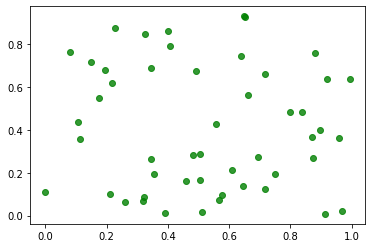

In [ ]:
plt.scatter(x, y, alpha=0.8, c='g')

In [ ]:
query = np.random.rand(1, 2)
query_x, query_y = xy(query)

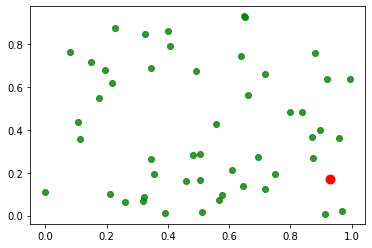

In [ ]:
plt.scatter(x, y, alpha=0.8, c='g')
plt.scatter(query_x, query_y, color='r', s=80)

In [ ]:
from sklearn.cluster import KMeans
def create_coarse_quantizer(space, n_clusters, random_state=0):
  return KMeans(n_clusters=n_clusters, random_state=0).fit(vectors)

In [ ]:
coarse_quantizer = create_coarse_quantizer(vectors, n_clusters=5)
coarse_quantizer_centroids = np.array(coarse_quantizer.cluster_centers_)

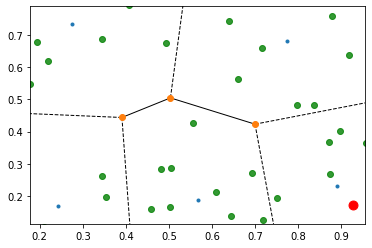

In [ ]:
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(coarse_quantizer_centroids)
fig = voronoi_plot_2d(vor)
plt.scatter(query_x, query_y, color='r', s=80)
plt.scatter(x, y, alpha=0.8, c='g')

In [ ]:
def train(vec, M, clusters):
  Dm = int(vec.shape[1] / M)
  codebook = np.empty((M, clusters, Dm), np.float32)
  for m in range(M):
    vec_sub = vec[:, m * Dm : (m+1) * Dm]
    kmeans_t = KMeans(n_clusters=clusters, random_state=0).fit(vec_sub)
    codebook[m] = np.array(kmeans_t.cluster_centers_)
  
  return codebook

In [ ]:
codebook = train(vectors, M=2, clusters=5)

In [ ]:
codebook_vectors = []
for i in range(codebook.shape[1]):
  for j in range(codebook.shape[1]):
    codebook_vectors.append([codebook[0][i][0], codebook[1][j][0]])
codebook_centroids_x, codebook_centroids_y = xy(np.array(codebook_vectors))

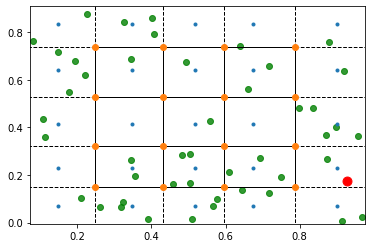

In [ ]:
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(codebook_vectors)
fig = voronoi_plot_2d(vor)
plt.scatter(query_x, query_y, color='r', s=80)
plt.scatter(x, y, alpha=0.8, c='g')


In [ ]:
from scipy.cluster.vq import vq
def encode(codebook, vec):
  M, _K, Dm = codebook.shape
  pqcode = np.empty((vec.shape[0], M), np.uint8)

  for m in range(M):
    vec_sub = vec[:, m * Dm : (m+1) * Dm]
    pqcode[:, m], dist = vq(vec_sub, codebook[m])
  return pqcode

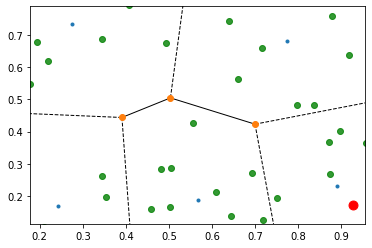

In [ ]:
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(coarse_quantizer_centroids)
fig = voronoi_plot_2d(vor)
plt.scatter(query_x, query_y, color='r', s=80)
plt.scatter(x, y, alpha=0.8, c='g')

In [ ]:
from scipy.spatial.distance import cdist
def search(codeword, pqcode, query, clusters):
  M, _K, Dm = codeword.shape
  dist_table = np.empty((M, clusters), np.float32)

  for m in range(M):
    query_sub = query[:, m * Dm : (m+1) * Dm]
    dist_table[m, :] = cdist(query_sub, codeword[m], 'sqeuclidean')[0]
  return np.sum(dist_table[range(M), pqcode], axis=1)

In [ ]:
pqcodes = encode(codebook, vectors)
distances = search(codebook,pqcodes, query, clusters=5)

In [ ]:
nn = vectors[np.argmin(distances)]

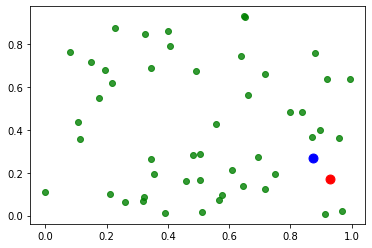

In [ ]:
from scipy.spatial import Voronoi, voronoi_plot_2d
plt.scatter(query_x, query_y, color='r', s=80)
plt.scatter(x, y, alpha=0.8, c='g')
plt.scatter(nn[0], nn[1], color='b', s=80)
